In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
gme = pd.read_json('gme.json')
gme2 = pd.read_json('recentGME.json')

In [2]:
gme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


The variables in this data set are Date (The date that the stock’s behavior was observed.), Open (The price the stock sold for as soon as the markets opened.), High (The highest price the stock sold for on a particular day.), Low (The lowest price the stock sold for on a particular day.), Close (The price the stock sold for as soon as the markets closed.), Adj Close (The close price after all corporate actions of the day are accounted for (i.e. dividends, splitting, etc.).), and Volume (The number of stocks traded (bought and sold) in a day.)

In [3]:
gme["High"].idxmax()

4772

In [4]:
gme["Date"].loc[4772]

Timestamp('2021-01-28 00:00:00')

In [5]:
count = 0
total = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].month == 1:
        avg  = gme.loc[i]["High"] +gme.loc[i]["Low"]/2
        total += avg
        count += 1
total/count

12.83181743370786

In [6]:
count = 0
total = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].month == 7:
        avg  = gme.loc[i]["High"] +gme.loc[i]["Low"]/2
        total += avg
        count += 1
total/count

14.33493130818966

<AxesSubplot:xlabel='Low', ylabel='Volume'>

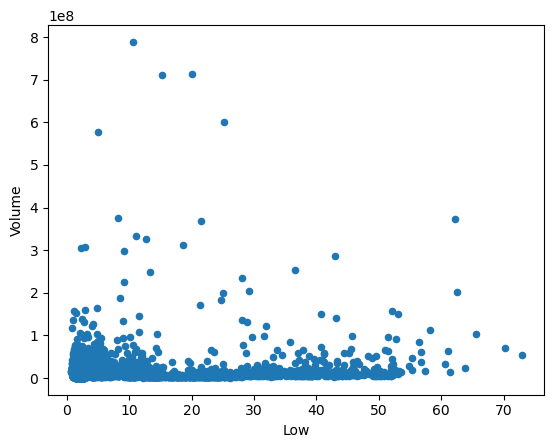

In [7]:
gme.plot.scatter(x ='Low', y= 'Volume', s=None, c=None)

In [8]:
gme['Volume'].corr(gme['Low'])

0.10259646883179024

In [9]:
dateAsNum = gme['Date']
day = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].days == :
        
gme.loc[i] = day

SyntaxError: invalid syntax (3904828016.py, line 4)

In [ ]:
sns.scatterplot(data= gme, x="Date", y="High")

In [ ]:
gme['Date'].corr(gme['High'])

In [ ]:
log_high = np.log(gme["High"])
gme["Log High"] = log_high

In [ ]:
gme['numeric_time'] = pd.to_datetime(gme['Date']).astype('int64') // 10**9  # Converts to seconds since epoch

# Now you can calculate the Pearson correlation between 'numeric_time' and another variable
correlation = gme['numeric_time'].corr(gme['Log High'])

In [10]:
tsla = pd.read_json('tsla.json')

In [ ]:
tsla.info()

In [ ]:
tsla.plot.scatter(x ='open', y= 'close', s=None, c=None)

In [ ]:
tsla['open'].corr(tsla['close'])

In [ ]:
gme.loc[gme["Date"].idxmax()]

In [ ]:
gme.loc[gme["Date"].idxmin()]

In [ ]:
count = 0
for i in range(len(gme)):
    if gme.loc[i]['Date'].year == 2019:
        count += 1
print(count)

In [ ]:
for j in range(len(gme['Date'].year)):
    for i in range(len(gme)):
        if gme.loc[i]['Date'].year == j:
            count += 1
print(count)

Welcome to Alpha Vantage! Here is your API key: YTBRS0WG5ZQBLXOS. Please record this API key at a safe place for future data access.

In [ ]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=5min&apikey=YTBRS0WG5ZQBLXOS'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
example = pd.DataFrame(data['Time Series (5min)'])
example.head()

In [ ]:
gme.drop('Adj Close', axis=1, inplace=True)

In [ ]:
def gather_data(start, end):
    '''
    Request
    '''
    data = {
        "Date:" [],
        "Open:" [],
        
    }

In [ ]:
gme[].append

In [ ]:
url = 'https://api.polygon.io/v1/open-close/GME/2024-05-14?adjusted=false&apiKey=EDzuZvt2GykLpYHVmg6TyHhgzY4Ed2Sy'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
def gather_data(start, end):
    '''
    Request a json payload from Polygon.io for each day within the timeframe, described by
    {start} and {end}.
    Once I get json for a day, I need to add it to a dictionary before returning the dataframe.
    '''
    # Create dictionary for final dataframe
    data = {"Date": [],"Open": [],"High": [],"Low": [],"Close": [],"Volume": []}
    
    # Get the month as a number to iterate through timespan
    startMonth = pd.to_datetime(start).month
    endMonth = pd.to_datetime(end).month
    
    # Iterate through timespan
    for month in range(startMonth, endMonth + 1):
        # Get most of days in month
        for day in range(1, 26):
            # Create string of date for URL
            if day < 10:
                current = '2024-0' + str(month) + '-0' + str(day)
            else:
                current = '2024-0' + str(month) + '-0' + str(day) 
            
            # Make request
            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=false&apiKey=EDzuZvt2GykLpYHVmg6TyHhgzY4Ed2Sy'
            r = requests.get(url)
            jsonData = r.json()
            
            # Add date-specific data to dictionary
            data["Open"].append(jsonData['open'])
            data["High"].append(jsonData['high'])
            data["Low"].append(jsonData["low"])
            data["Close"].append(jsonData['close'])
            data["Volume"].append(jsonData['volume'])
            date = pd.to_datetime(current)
            data["Date"].append(date)
    
        # Remove break statements if you want to make multiple requests
            break
        break
    
    # return dataframe of data
    return pd.DataFrame(data)

In [ ]:
gather_data('2024-05-14', '2024-09-26')

In [ ]:
gme2 = pd.read_json("recentGME.json")
gme.drop(["Adj Close"], inplace=True, axis=1)
# Adding new data to the bottom of the OG GME dataframe
result = pd.concat([gme, gme2])
result.reset_index(inplace=True)

In [ ]:
result.tail()

In [ ]:
https://api.polygon.io/v2/aggs/ticker/AMC/range/1/day/2020-01-01/2024-09-30?adjusted=true&sort=asc&apiKey=EDzuZvt2GykLpYHVmg6TyHhgzY4Ed2Sy

In [ ]:
# get AMC
url = 'https://api.polygon.io/v2/aggs/ticker/AMC/range/1/day/2020-01-01/2024-09-30?adjusted=true&sort=asc&apiKey=EDzuZvt2GykLpYHVmg6TyHhgzY4Ed2Sy'
r = requests.get(url)
data = r.json()

# print(data)

In [ ]:
amc = pd.read_csv("AMC.csv")

In [ ]:
amc["Date"] = pd.to_datetime(amc["Date"])

In [ ]:
sns.scatterplot(data= gme, x="Date", y="High")
sns.scatterplot(data=amc, x="Date", y="High")

In [ ]:
wsb = pd.read_json('light_encode_wsb.json')

In [ ]:
wsb.rename(columns={"timestamp":"Date"}, inplace=True)

In [ ]:
mergeWSB = pd.merge(wsb, gme, how = "inner", on = "Date")

In [ ]:
merged_amc = pd.merge(wsb, amc, how = "inner", on = "Date")

In [ ]:
merged_amc.head()

In [ ]:
sns.scatterplot(data= wsb, x="Date", y="comms_num")
sns.scatterplot(data=amc, x="Date", y="High")
sns.scatterplot(data= gme, x="Date", y="High")

In [ ]:
sns.scatterplot(data= wsb, x="Date", y="comms_num")

In [ ]:
sns.scatterplot(data=amc, x="Date", y="High")

In [ ]:
sns.scatterplot(data= gme, x="Date", y="High")

In [11]:
tsla = pd.read_json('tsla.json')
musk = pd.read_json('musk.json')

In [12]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

In [13]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2784 non-null   datetime64[ns]
 1   Tweet Count  2784 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 43.6 KB


<AxesSubplot:xlabel='date', ylabel='high'>

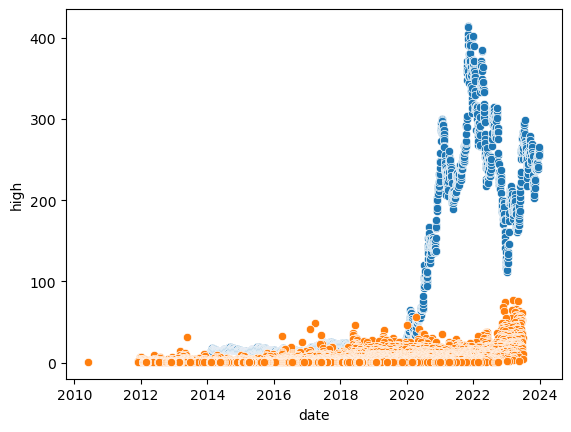

In [14]:

sns.scatterplot(data= tsla, x="date", y="high")
sns.scatterplot(data= musk, x="Date", y="Tweet Count")

In [15]:
musk.rename(columns={'Date': 'date'}, inplace=True)

In [16]:
result = tsla.merge(musk, how='inner', on='date')

<AxesSubplot:xlabel='Tweet Count', ylabel='high'>

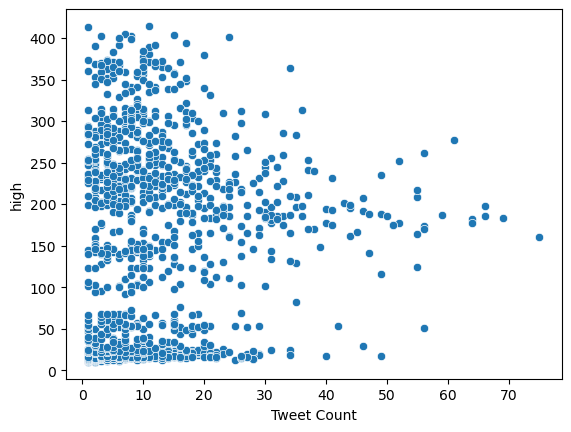

In [17]:
sns.scatterplot(data= result, x="Tweet Count", y= "high")

In [19]:
result['Tweet Count'].corr(result['high'])

0.2899462569179393